In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

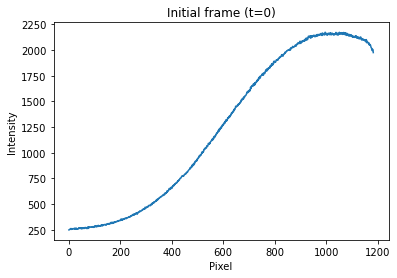

In [12]:
# Plot the initial frame
plt.plot(pd.read_csv('intensity_data/frame_01.csv')['Value'])
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Initial frame (t=0)')
plt.show()

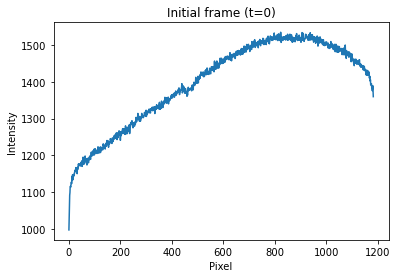

In [66]:
# Plot the last frame
plt.plot(pd.read_csv('intensity_data/frame_57.csv')['Value'])
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.title('Initial frame (t=0)')
plt.show()

Start with the 1-D diffusion equation:

$$
\frac{\partial\phi}{\partial t} = D\frac{\partial^2\phi}{\partial x^2}
$$

where $\phi$ is the density of the fluid.


Using a finite-differences method, we can define

$$
\frac{\partial^2\phi}{\partial x^2} = \frac{\phi(x + h) - 4\phi(x) + \phi(x - h)}{h^2}
$$

where h is some arbritrarily small step size

In [78]:
def dx_sq(phi):
    phi_plus_h = phi[0:-2]
    phi_minus_h = phi[2:]
    phi_centered = phi[1:-1]
    return phi_plus_h - 2 * phi_centered + phi_minus_h

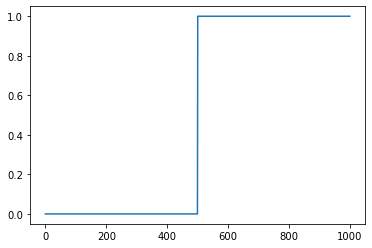

In [160]:
phi = np.asarray(np.append(np.zeros(500), np.ones(500)))
plt.plot(phi)

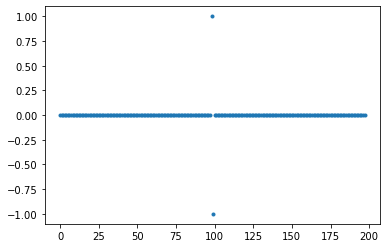

In [158]:
plt.plot(dx_sq(phi), linestyle=' ', marker='.')
plt.show()

In [172]:
D = 1000
T = 10
dt = .0001
n = int(T/dt)
n

100000

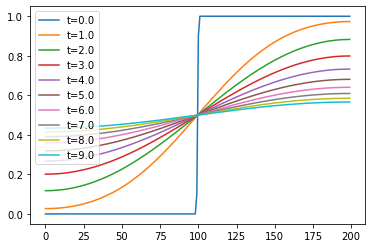

In [175]:
phi = np.asarray(np.append(np.zeros(100), np.ones(100)))

for i in range(n):
    phi_dx2 = dx_sq(phi)
    phi_centered = phi[1:-1]
    phi[1:-1] = phi_centered + dt * (D * phi_dx2)
    
    # Apply Neumann B.C.
    phi[0] = phi[1]
    phi[-1] = phi[-2]
    
    if i % 10000 == 0:
        plt.plot(phi, label=f't={i*dt}')
plt.legend()
plt.show()

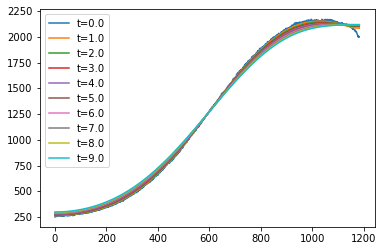

In [176]:
phi = np.asarray(pd.read_csv('intensity_data/frame_01.csv')['Value'])

for i in range(n):
    phi_dx2 = dx_sq(phi)
    phi_centered = phi[1:-1]
    phi[1:-1] = phi_centered + dt * (D * phi_dx2)
    
    # Apply Neumann B.C.
    phi[0] = phi[1]
    phi[-1] = phi[-2]
    
    if i % 10000 == 0:
        plt.plot(phi, label=f't={i*dt}')
plt.legend()
plt.show()